# Praktikum Modul 4
### Supervised Learning

---

Nama    : Nur Azka Rahadiansyah

NRP     : 5027221064

### Soal :

#### Soal Clustering
 
Anda adalah seorang analis data di sebuah perusahaan bank. Anda diminta untuk memahami karakteristik dari para nasabah yang menggunakan layanan kartu kredit. Anda telah diberikan dataset yang berisikan segmentasi nasabah bank untuk melakukan tugas ini.
Tugas:

1. Lakukan analisis eksploratif data untuk memahami karakteristik dasar dataset.
2. Gunakan teknik clustering untuk mengelompokkan nasabah berdasarkan segmentasi yang diberikan. Tentukan jumlah cluster yang optimal dan jelaskan pemilihan Anda.
3. Gunakan silhouette coefficient untuk mengevaluasi hasil clustering Anda.
4. Berikan interpretasi selengkap mungkin untuk setiap cluster yang dihasilkan. Misalnya, apakah ada cluster yang mewakili nasabah berpendapatan tinggi dengan umur yang rendah dan total transaksi yang tinggi?


---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer


In [2]:
# Membaca dataset
dn = pd.read_csv('data_nasabah.csv')

In [3]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_Nasabah                  1050 non-null   int64  
 1   Usia_Nasabah                1000 non-null   float64
 2   Jenis_Kelamin               1050 non-null   object 
 3   Jumlah_Tanggungan           1050 non-null   int64  
 4   Tingkat_Pendidikan          883 non-null    object 
 5   Status_Pernikahan           976 non-null    object 
 6   Pendapatan                  932 non-null    float64
 7   Kategori_Kartu              1050 non-null   object 
 8   Lama_Menjadi_Nasabah        1050 non-null   int64  
 9   Jumlah_Layanan              1050 non-null   int64  
 10  Limit_Kredit                1050 non-null   float64
 11  Saldo_Revolting_Total       1050 non-null   int64  
 12  Total_Transaksi             1050 non-null   int64  
 13  Jumlah_Melakukan_Transaksi  1050 

In [4]:
dn.drop(columns='ID_Nasabah', inplace=True)

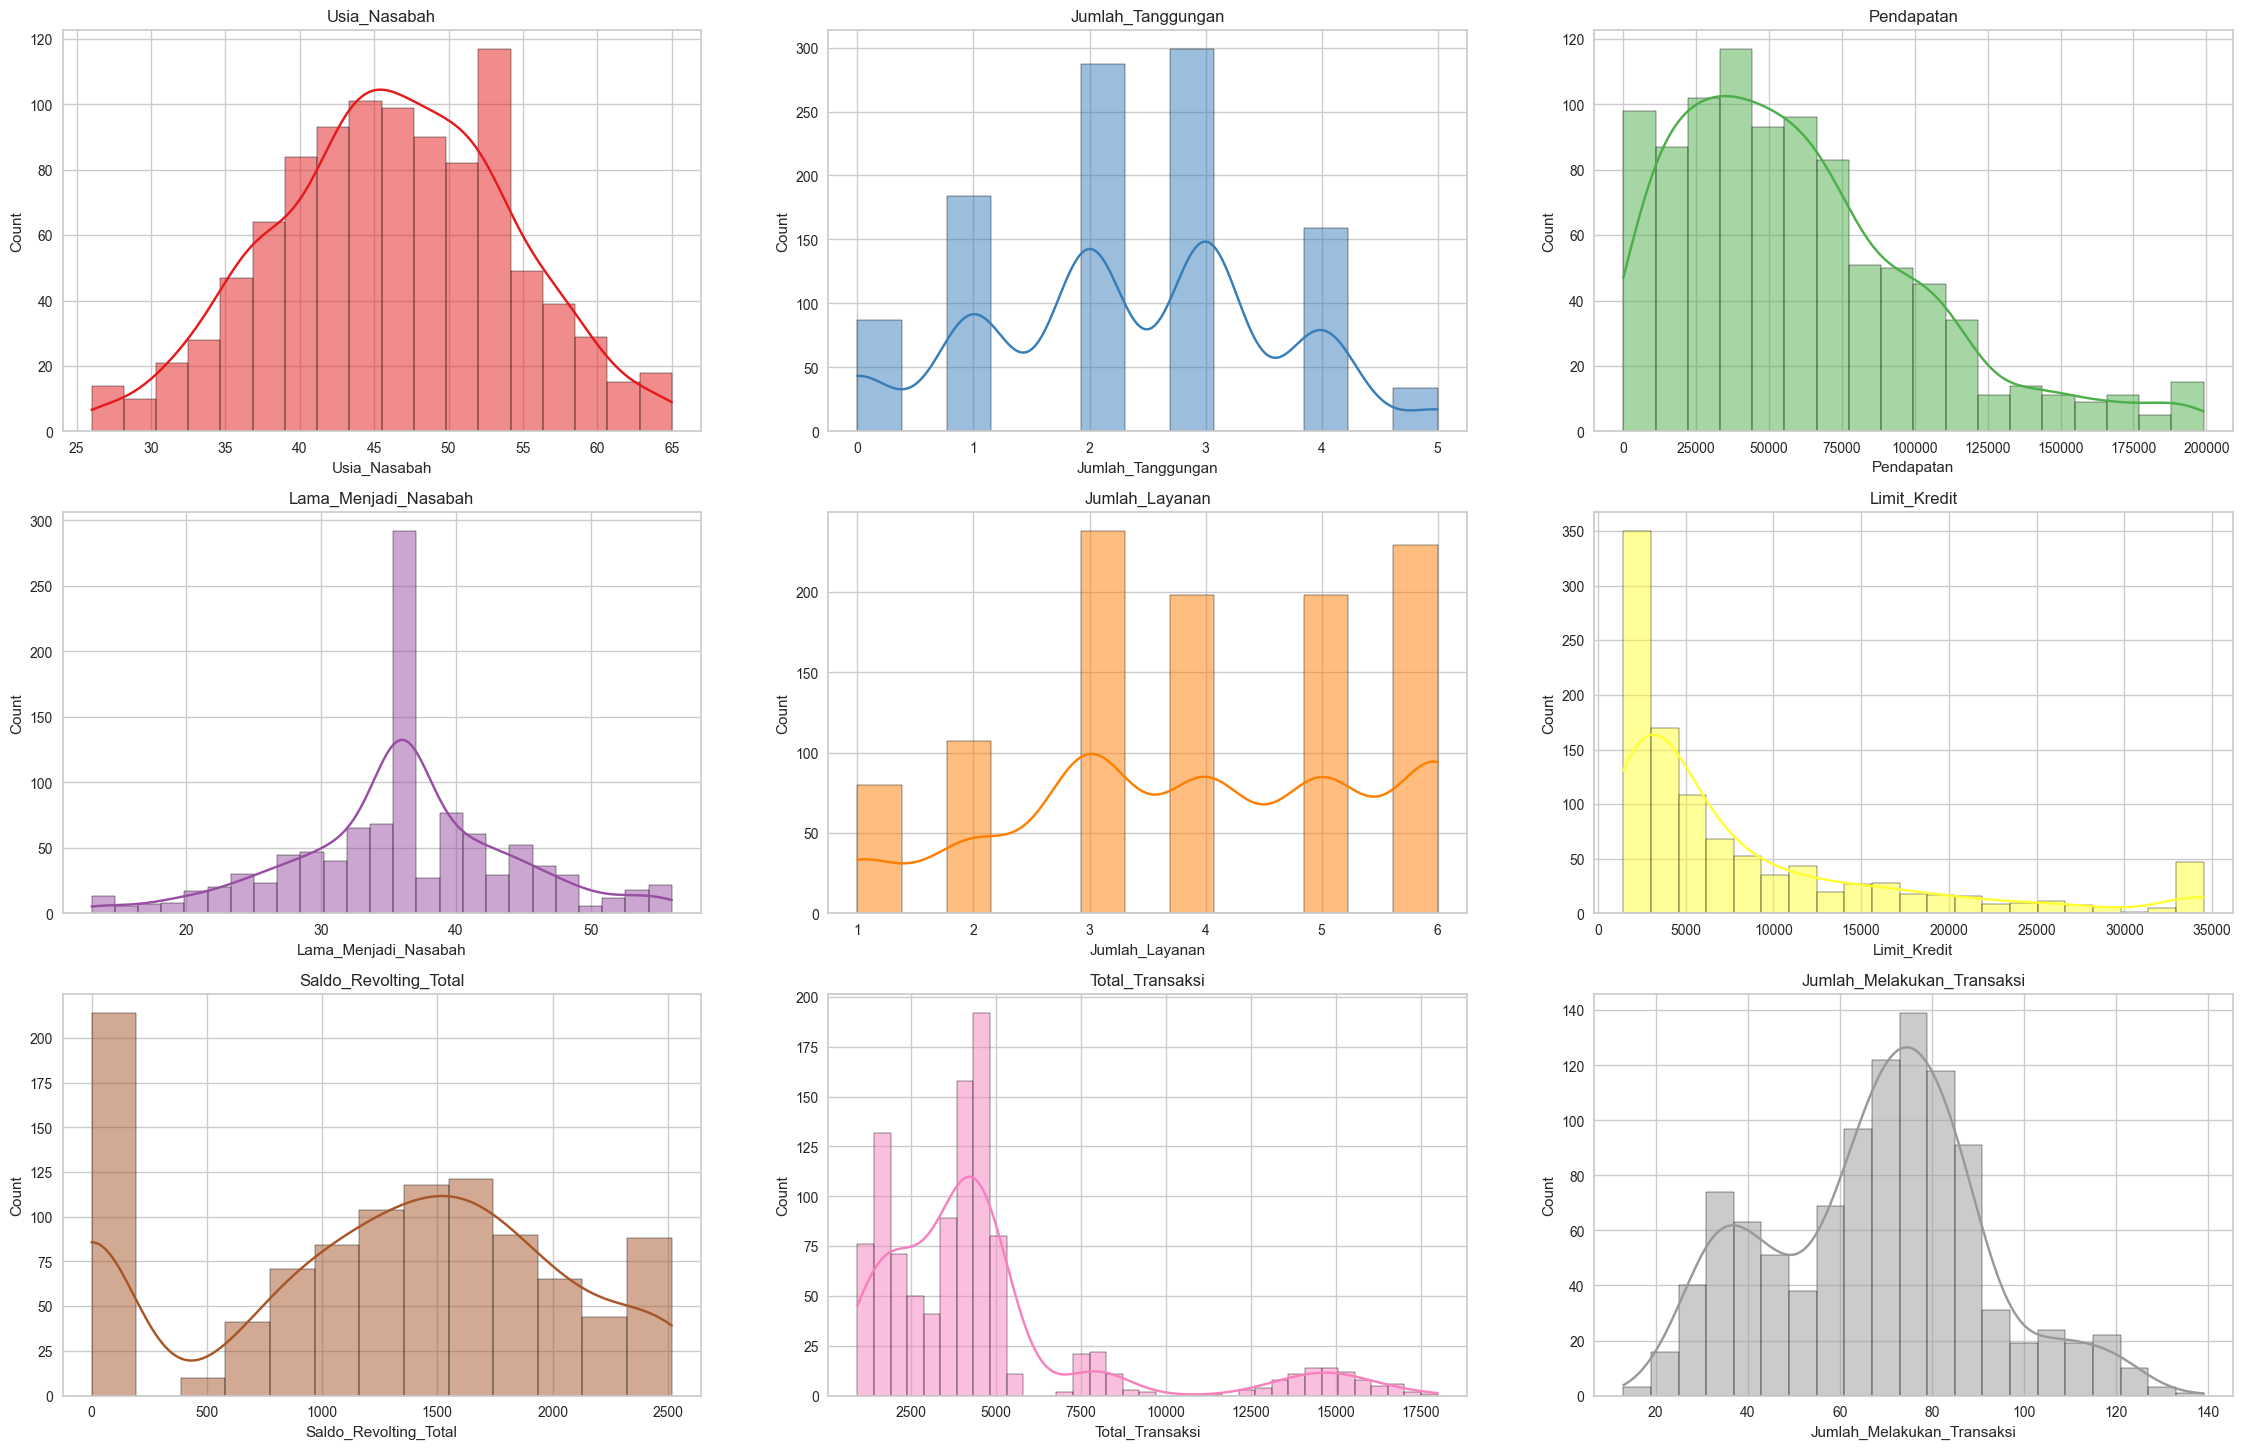

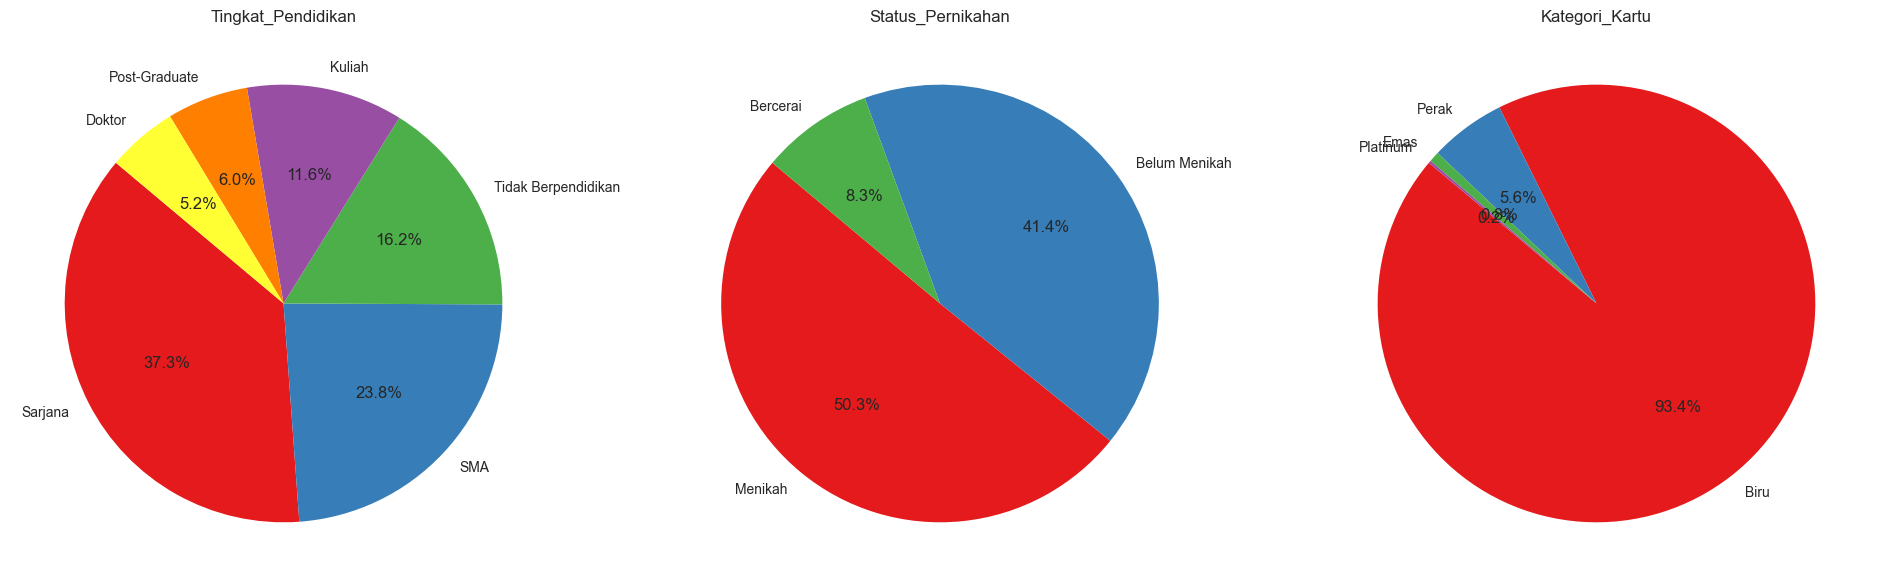

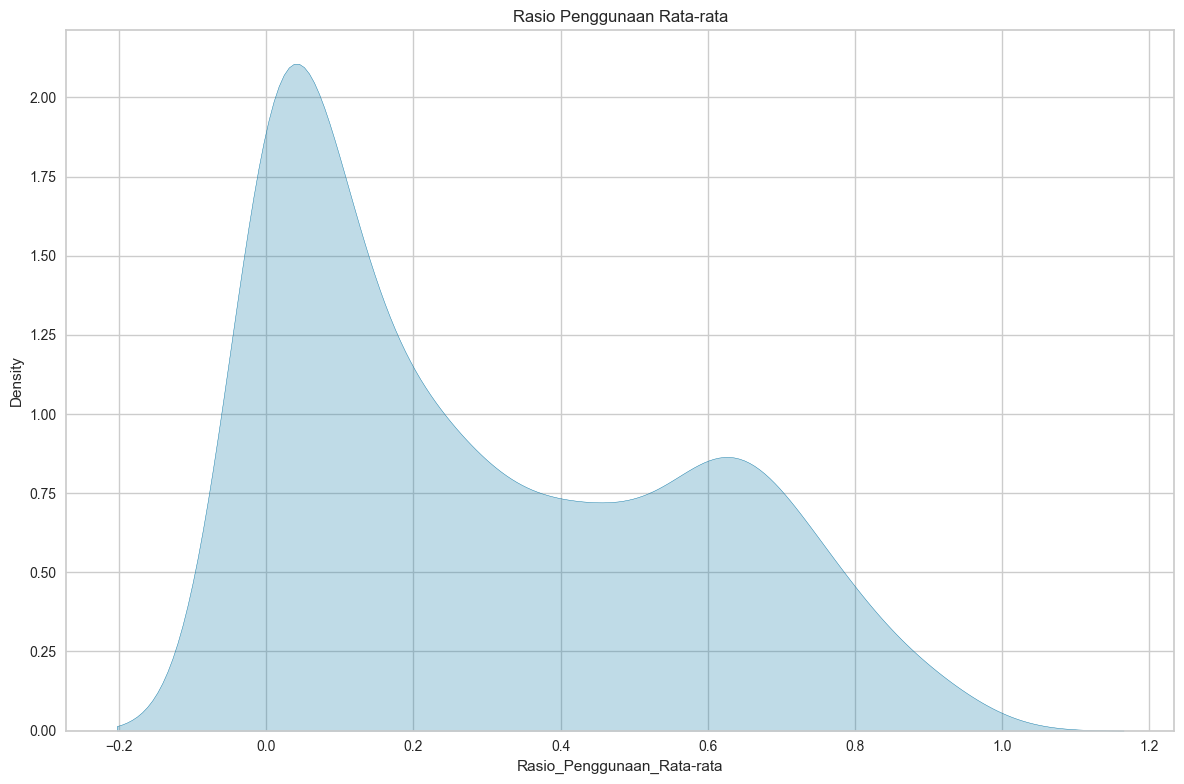

In [5]:
hist_col = ['Usia_Nasabah', 'Jumlah_Tanggungan', 'Pendapatan',
           'Lama_Menjadi_Nasabah', 'Jumlah_Layanan',
           'Limit_Kredit', 'Saldo_Revolting_Total', 'Total_Transaksi',
           'Jumlah_Melakukan_Transaksi']

color_palette = sns.color_palette("Set1", len(hist_col))

plt.figure(figsize=(28, 24))
for i, column in enumerate(hist_col, 1):
    plt.subplot((len(hist_col) // 3) + 1, 3, i)
    sns.histplot(data=dn, x=column, color=color_palette[i - 1], kde=True)
    plt.xlabel(column)
    plt.title(f'{column}')

pie_col = ['Tingkat_Pendidikan', 'Status_Pernikahan', 'Kategori_Kartu']

plt.figure(figsize=(24, 8))
for i, column in enumerate(pie_col, 1):
    plt.subplot(1, 3, i)
    dn[column].value_counts().plot.pie(colors=color_palette, autopct='%1.1f%%', startangle=140)
    plt.ylabel('')
    plt.title(f'{column}')

plt.figure(figsize=(12, 8))
sns.kdeplot(data=dn, x='Rasio_Penggunaan_Rata-rata', fill=True)
plt.xlabel('Rasio_Penggunaan_Rata-rata')
plt.ylabel('Density')
plt.title('Rasio Penggunaan Rata-rata')

plt.tight_layout()
plt.show()


Berdasarkan analisis data, mayoritas nasabah dalam dataset ini memiliki rentang usia antara 40 hingga 49 tahun. Meskipun mayoritas nasabah adalah perempuan, perbedaannya sangat tipis dengan jumlah nasabah laki-laki. Secara umum, nasabah memiliki jumlah tanggungan sebanyak 4 orang, dan mayoritas dari mereka memiliki tingkat pendidikan sarjana. Mayoritas nasabah juga sudah menikah, dengan jumlah yang signifikan dibandingkan dengan nasabah yang belum menikah atau cerai. Kartu biru adalah kategori kartu yang paling banyak dimiliki oleh nasabah, sementara kartu platinum jumlahnya paling sedikit. Sebagian besar nasabah telah menjadi nasabah selama 20-30 tahun, dengan sebagian besar dari mereka mendapatkan 3 atau 6 layanan. Limit kredit tertinggi umumnya diperoleh oleh pengguna kartu platinum, melebihi 30000. Sedangkan jumlah nasabah dengan saldo revolting di atas 1500 terbilang sedikit. Lebih dari 250 nasabah melakukan transaksi dengan total nominal di atas 5000, sementara sebagian besar nasabah melakukan transaksi antara 60 hingga 80 kali. Rasio penggunaan kartu kredit rata-rata masih perlu dipahami lebih lanjut. Dengan demikian, dapat disimpulkan bahwa nasabah dalam dataset ini umumnya adalah individu dengan usia menengah, sudah menikah, memiliki pendidikan tinggi, dan mayoritas menggunakan kartu biru dengan sebagian kecil menggunakan kartu platinum, sementara kebiasaan transaksinya bervariasi.

Visualisasi ini secara keseluruhan membantu dalam memahami karakteristik dasar nasabah dari dataset tersebut, mencakup aspek demografi, keuangan, dan penggunaan layanan.

---

**Handling Missing value**

In [6]:
col_box = ['Usia_Nasabah', 'Jumlah_Tanggungan', 'Pendapatan',
           'Lama_Menjadi_Nasabah', 'Jumlah_Layanan',
           'Limit_Kredit', 'Saldo_Revolting_Total', 'Total_Transaksi',
           'Jumlah_Melakukan_Transaksi', 'Rasio_Penggunaan_Rata-rata']
           
dn.dropna(inplace=True)
X = dn[col_box]
dn.isna().sum()

Usia_Nasabah                  0
Jenis_Kelamin                 0
Jumlah_Tanggungan             0
Tingkat_Pendidikan            0
Status_Pernikahan             0
Pendapatan                    0
Kategori_Kartu                0
Lama_Menjadi_Nasabah          0
Jumlah_Layanan                0
Limit_Kredit                  0
Saldo_Revolting_Total         0
Total_Transaksi               0
Jumlah_Melakukan_Transaksi    0
Rasio_Penggunaan_Rata-rata    0
dtype: int64

bertujuan untuk membersihkan data dengan mengisi nilai yang hilang
 Proses pembersihan data termasuk mengisi nilai yang hilang pada beberapa kolom dengan metode statistik seperti median untuk nilai numerik dan modus untuk nilai kategorikal.

In [21]:

dn['Usia_Nasabah'].fillna(dn['Usia_Nasabah'].median(), inplace=True)
dn['Tingkat_Pendidikan'].fillna(dn['Tingkat_Pendidikan'].mode()[0], inplace=True)
dn['Status_Pernikahan'].fillna(dn['Status_Pernikahan'].mode()[0], inplace=True)
dn['Pendapatan'].fillna(dn['Pendapatan'].median(), inplace=True)

C:\Users\Xzkaaa\AppData\Local\Temp\ipykernel_19296\3522515540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dn['Usia_Nasabah'].fillna(dn['Usia_Nasabah'].median(), inplace=True)
C:\Users\Xzkaaa\AppData\Local\Temp\ipykernel_19296\3522515540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

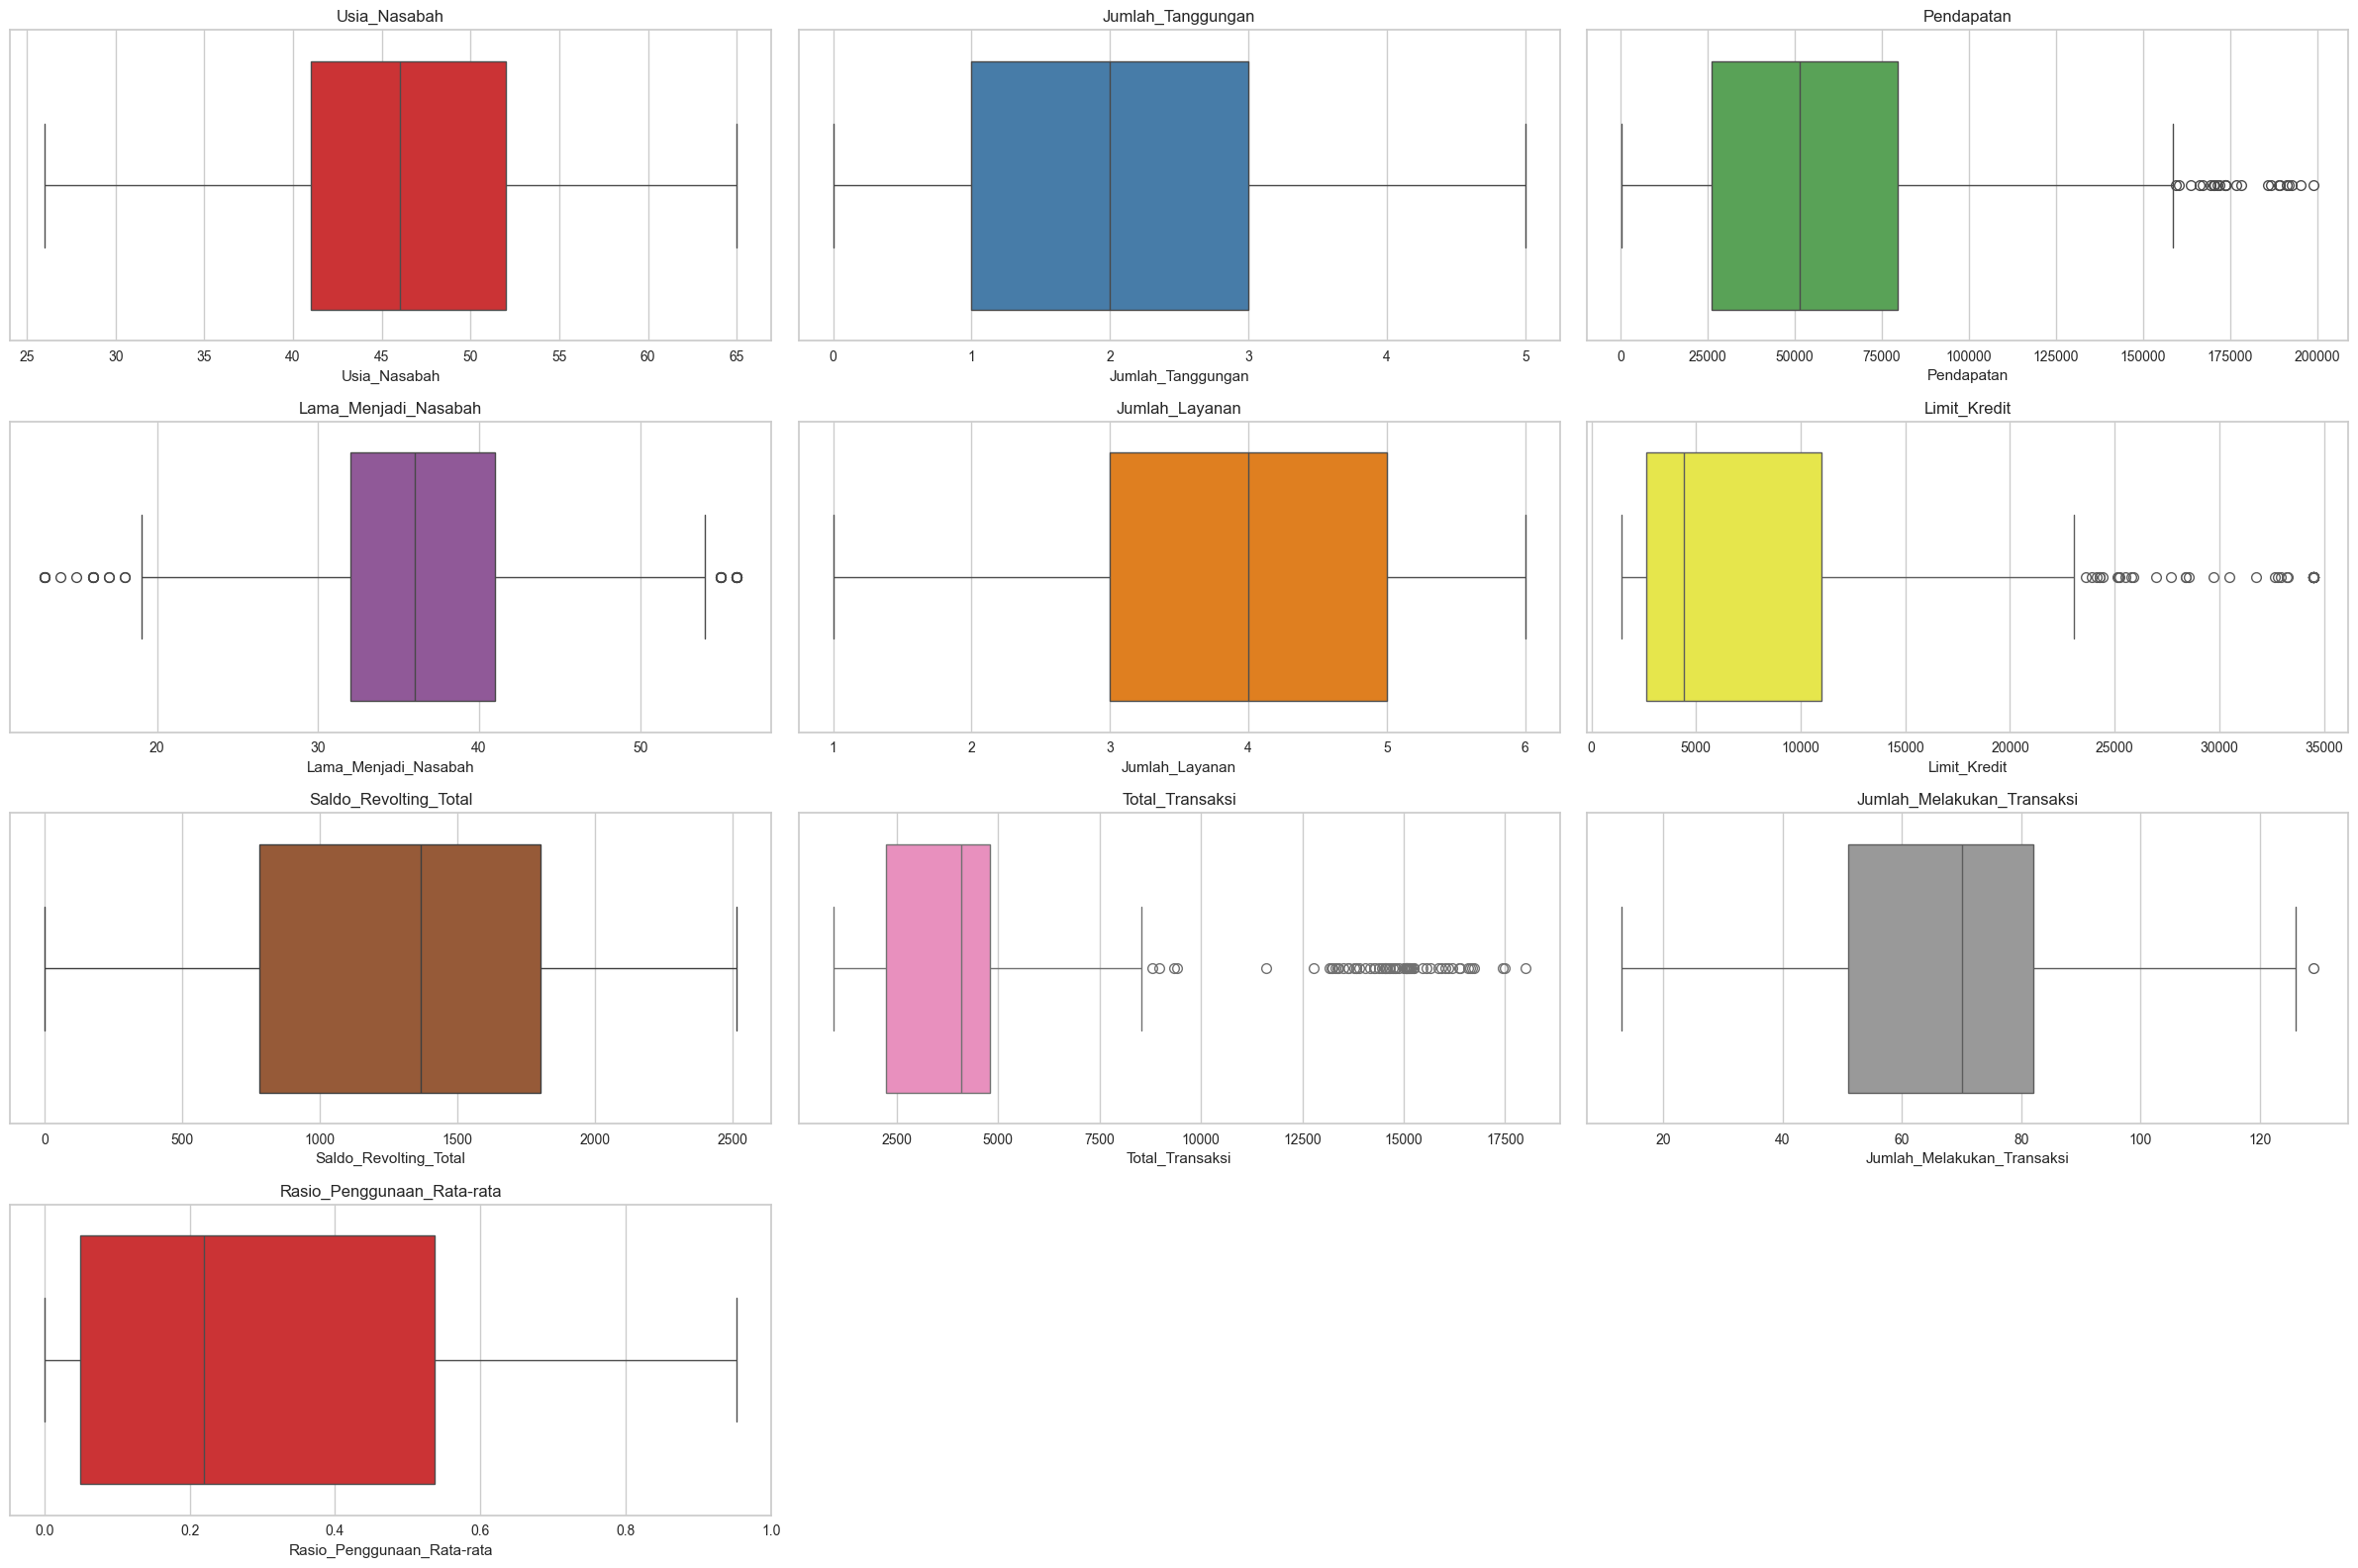

In [8]:
# Buat palet warna yang berbeda untuk setiap boxplot
color_palette = sns.color_palette("Set1", len(col_box))

# Buat subplot untuk menampilkan boxplot
plt.figure(figsize=(24, 16))
for i, column in enumerate(col_box, 1):
    plt.subplot((len(col_box)//3)+1, 3, i)
    sns.boxplot(data=dn, x=column, color=color_palette[i - 1])    
    plt.xlabel(column)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

visualisasi menggunakan boxplot untuk memeriksa distribusi serta potensi outlier dari beberapa variabel numerik dalam dataset

In [9]:
def count_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

outliers_counts = dn.select_dtypes(include=['number']).apply(count_outliers_iqr)

print("outliers:")
print(outliers_counts)

outliers:
Usia_Nasabah                   0
Jumlah_Tanggungan              0
Pendapatan                    24
Lama_Menjadi_Nasabah          27
Jumlah_Layanan                 0
Limit_Kredit                  53
Saldo_Revolting_Total          0
Total_Transaksi               67
Jumlah_Melakukan_Transaksi     1
Rasio_Penggunaan_Rata-rata     0
dtype: int64


In [10]:
def remove_outliers_std(dn, col_box, threshold=3):
    for column in col_box:
        mean = dn[column].mean()
        std = dn[column].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        dn = dn[(dn[column] >= lower_bound) & (dn[column] <= upper_bound)]
    return dn
# Panggil fungsi untuk menghapus outliers
dn_cleaned = remove_outliers_std(dn, col_box)


In [11]:
# Kolom-kolom yang akan diubah
obj_col = ['Jenis_Kelamin', 'Tingkat_Pendidikan', 'Status_Pernikahan', 'Kategori_Kartu']
label_encoder = LabelEncoder()

for col in obj_col:
    dn[col] = label_encoder.fit_transform(dn[col])

1. Menghitung Outlier: saya menggunakan metode IQR untuk mengidentifikasi nilai-nilai yang jauh dari distribusi umum.
2. Penghapusan Outlier: Menggunakan batasan 3 deviasi standar dari rata-rata untuk menghilangkan nilai ekstrem.
3. Encoding Variabel: Mengubah variabel kategorikal menjadi numerik

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
scaled_dn = scaler.fit_transform(dn)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_dn)
plot_data = pd.DataFrame(pca_data, columns=["X", "y"])

Normalisasi: Menggunakan MinMaxScaler untuk mengubah skala data ke rentang [0,1].
PCA: Reduksi dimensi dilakukan untuk mengurangi kompleksitas data sambil mempertahankan informasi penting.

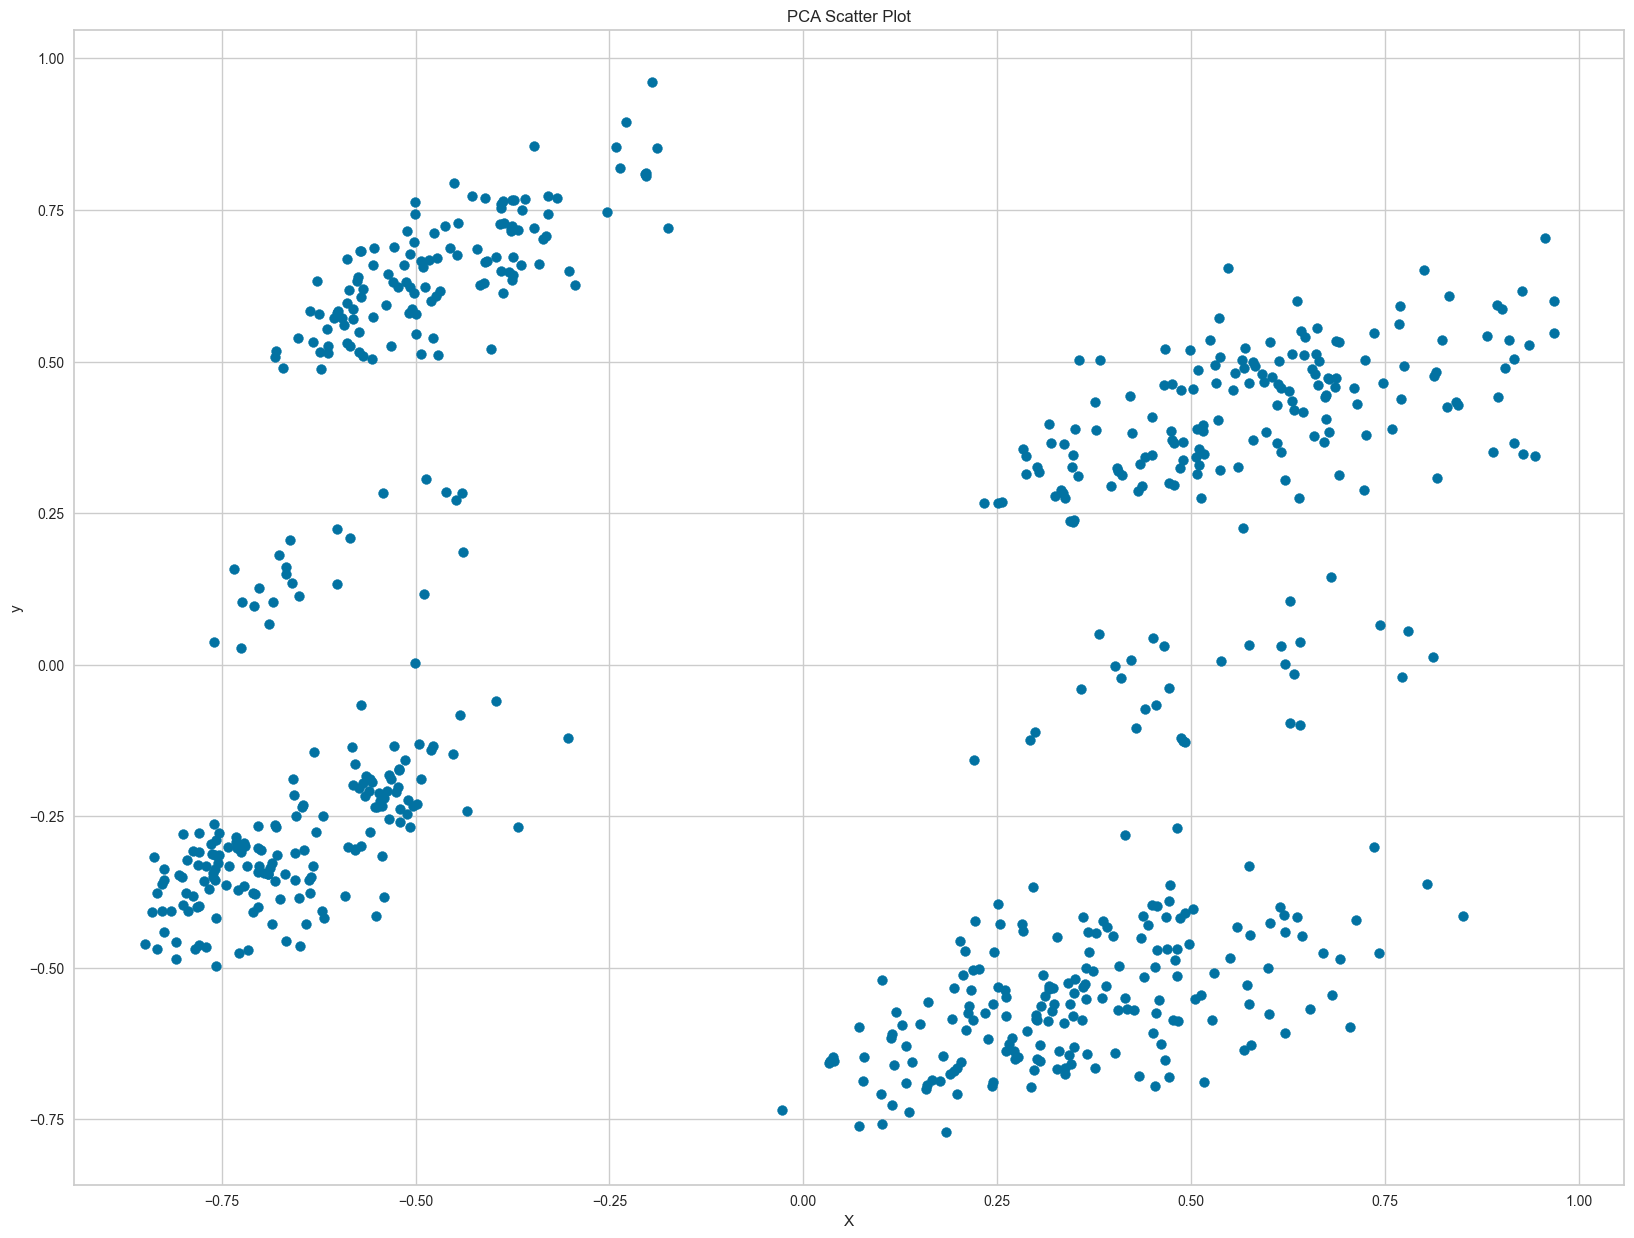

In [13]:
plt.figure(figsize=(20,15))
plt.scatter(plot_data["X"], plot_data["y"], s = 50)
plt.xlabel('X')
plt.ylabel('y')
plt.title('PCA Scatter Plot')
plt.show()

Penjelasan Plot: Dua sumbu, X dan Y, mewakili dua komponen utama yang diperoleh dari PCA.
Interpretasi: Cluster pada plot menunjukkan kelompok-kelompok nasabah dengan karakteristik serupa.

In [14]:
pca_data = plot_data.values

wcss = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(pca_data)
    wcss.append(km.inertia_)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))

wcss score for n_cluster = 2 is [174.9273035243273]
wcss score for n_cluster = 3 is [174.9273035243273, 92.34592174754664]
wcss score for n_cluster = 4 is [174.9273035243273, 92.34592174754664, 29.999731508223867]
wcss score for n_cluster = 5 is [174.9273035243273, 92.34592174754664, 29.999731508223867, 24.567919566390618]
wcss score for n_cluster = 6 is [174.9273035243273, 92.34592174754664, 29.999731508223867, 24.567919566390618, 20.551378597510602]
wcss score for n_cluster = 7 is [174.9273035243273, 92.34592174754664, 29.999731508223867, 24.567919566390618, 20.551378597510602, 16.811818615862443]
wcss score for n_cluster = 8 is [174.9273035243273, 92.34592174754664, 29.999731508223867, 24.567919566390618, 20.551378597510602, 16.811818615862443, 13.755040656124283]
wcss score for n_cluster = 9 is [174.9273035243273, 92.34592174754664, 29.999731508223867, 24.567919566390618, 20.551378597510602, 16.811818615862443, 13.755040656124283, 11.61959090558949]


Nilai WCSS digunakan untuk mengukur seberapa baik titik data dalam satu kluster berkumpul. Semakin rendah nilai WCSS, semakin baik.

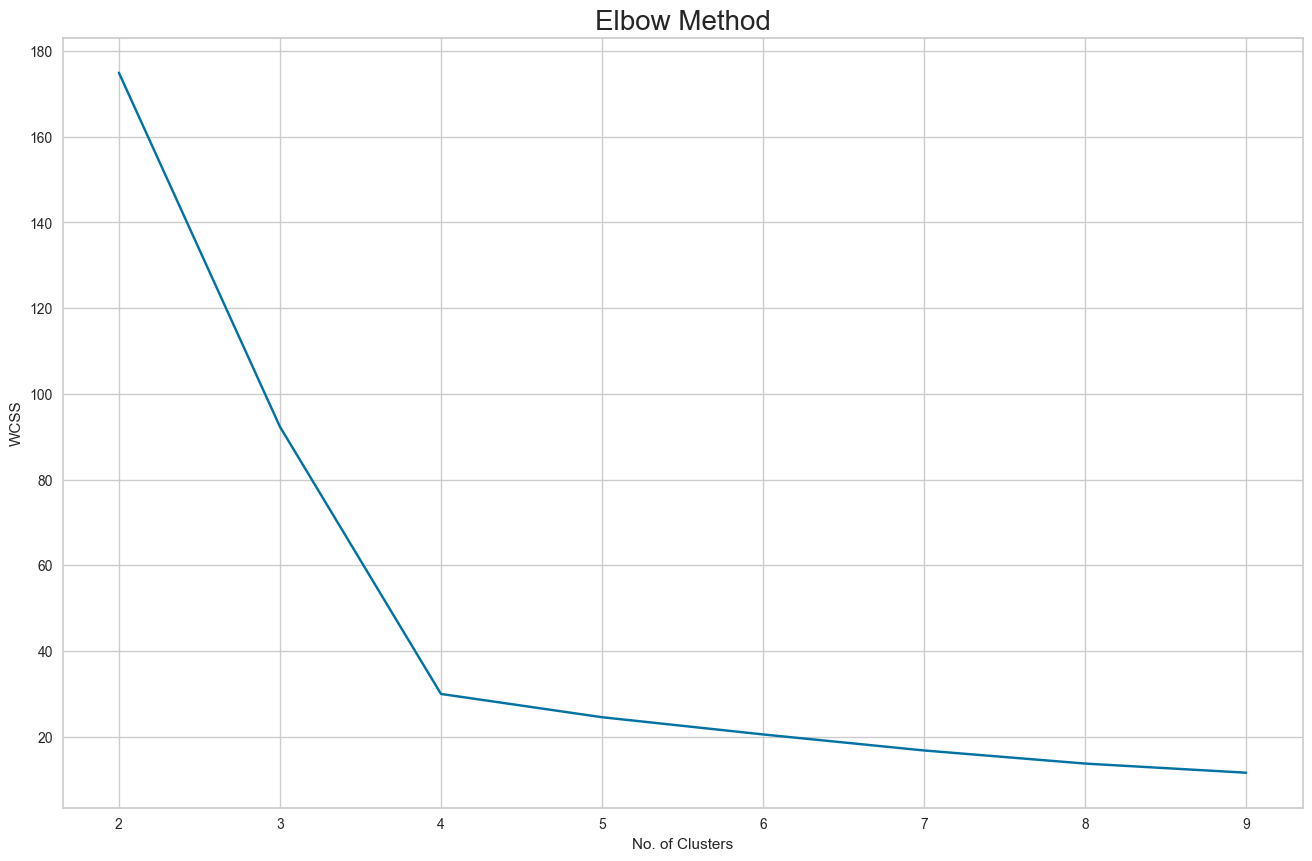

In [15]:
plt.figure(figsize=(16,10))
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

menunjukkan hubungan antara jumlah kluster dan nilai WCSS untuk menemukan titik di mana penambahan kluster berikutnya tidak memberikan perbaikan yang signifikan terhadap nilai WCSS 

titik 'elbow' terletak di sekitar 4 kluster, yang berarti 4 kluster bisa menjadi pilihan yang baik untuk jumlah kluster dalam mengelompokkan data ini dengan k-means

Elbow Method:


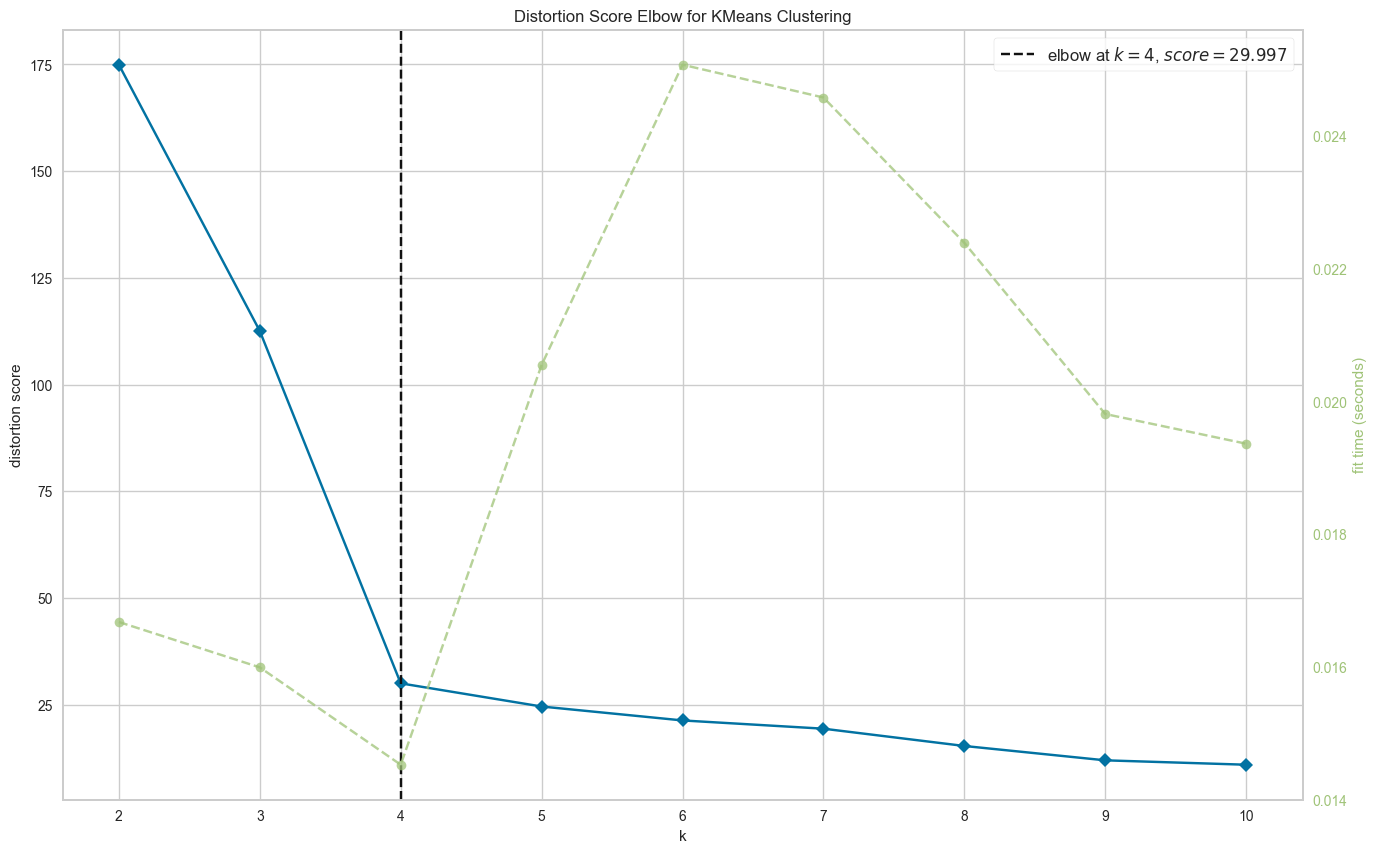

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:

plt.figure(figsize=(16,10))

print("Elbow Method:")
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_data)
Elbow_M.show()

Metode Elbow digunakan untuk menemukan jumlah kluster yang optimal dengan memplot nilai WCSS terhadap jumlah kluster.

In [17]:
kmeansmodel = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(pca_data)

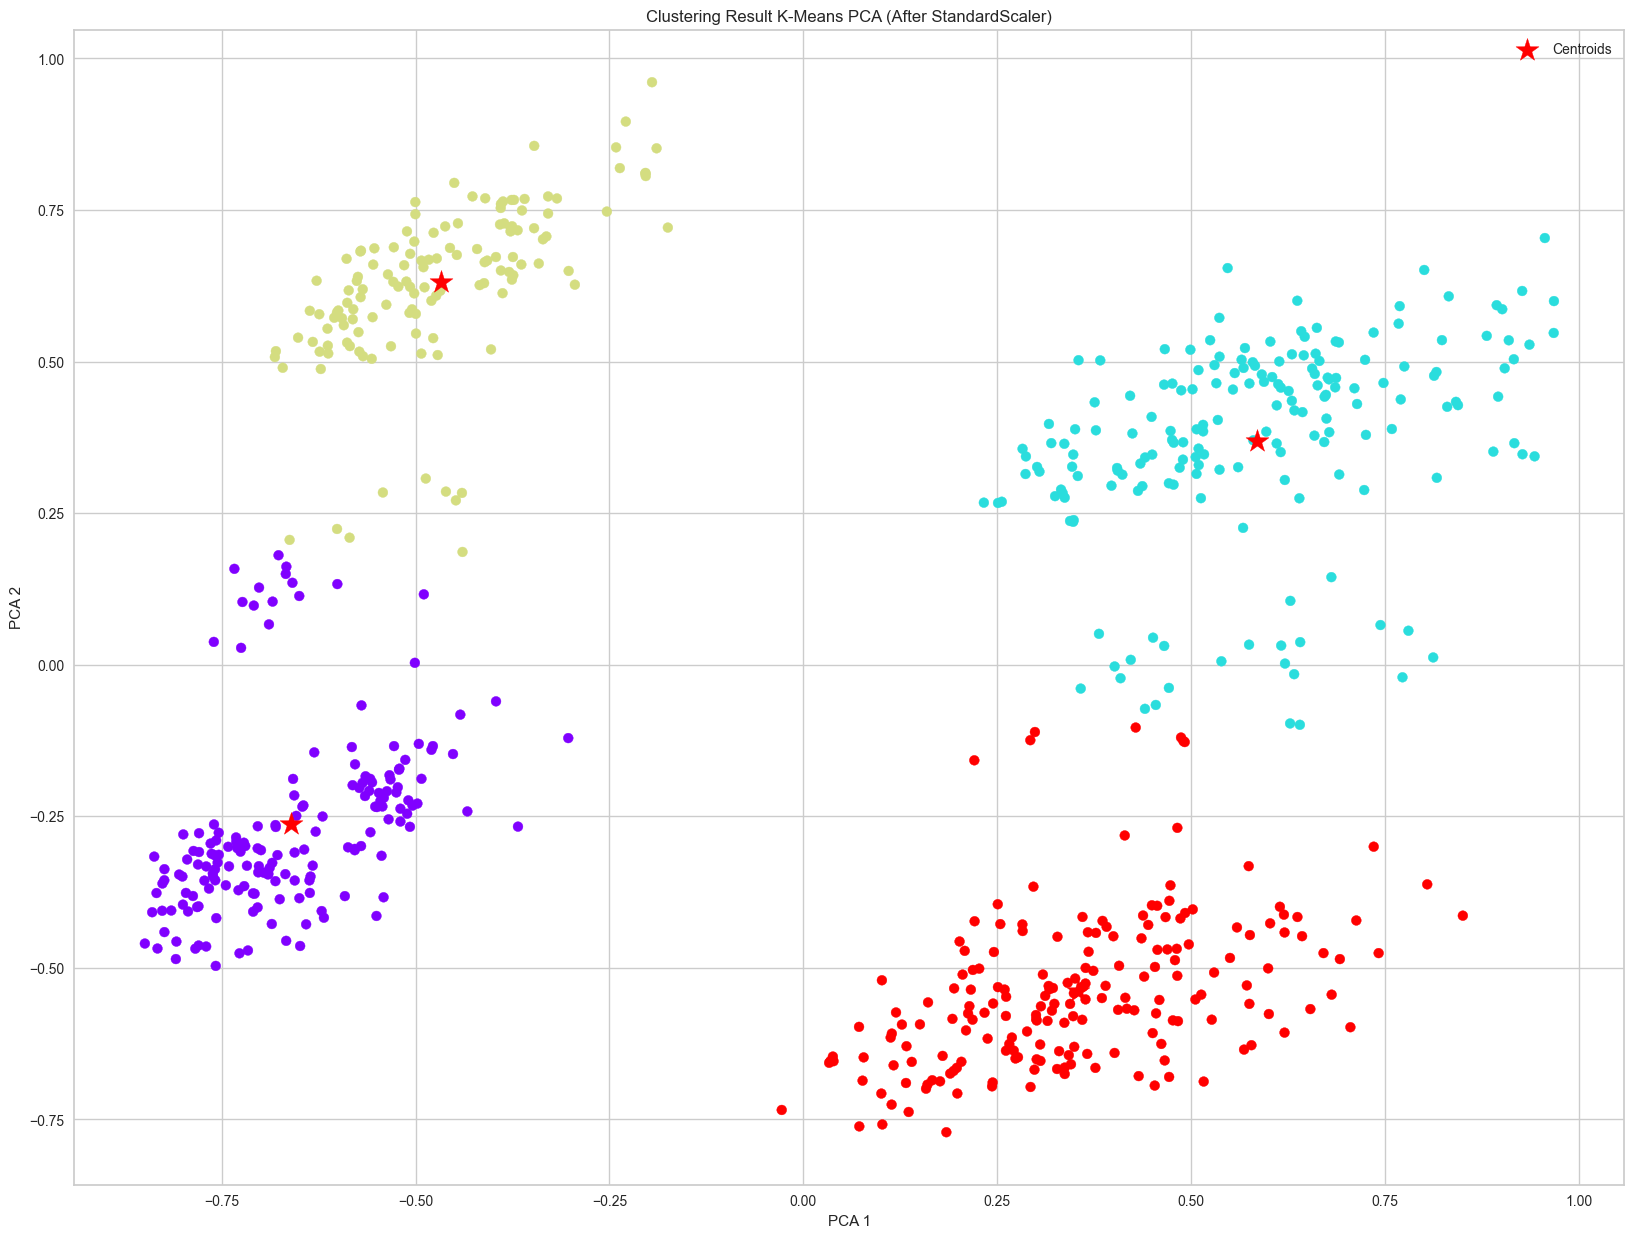

In [18]:
plt.figure(figsize=(20,15))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_kmeans, s=50, cmap="rainbow")

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids', marker = '*')
plt.title('Clustering Result K-Means PCA (After StandardScaler)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [19]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 2 to 1048
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Usia_Nasabah                681 non-null    float64
 1   Jenis_Kelamin               681 non-null    int32  
 2   Jumlah_Tanggungan           681 non-null    int64  
 3   Tingkat_Pendidikan          681 non-null    int32  
 4   Status_Pernikahan           681 non-null    int32  
 5   Pendapatan                  681 non-null    float64
 6   Kategori_Kartu              681 non-null    int32  
 7   Lama_Menjadi_Nasabah        681 non-null    int64  
 8   Jumlah_Layanan              681 non-null    int64  
 9   Limit_Kredit                681 non-null    float64
 10  Saldo_Revolting_Total       681 non-null    int64  
 11  Total_Transaksi             681 non-null    int64  
 12  Jumlah_Melakukan_Transaksi  681 non-null    int64  
 13  Rasio_Penggunaan_Rata-rata  681 non-nul

---

4. Berikan interpretasi selengkap mungkin untuk setiap cluster yang dihasilkan. Misalnya, apakah ada cluster yang mewakili nasabah berpendapatan tinggi dengan umur yang rendah dan total transaksi yang tinggi?

---

## **conclusion**

1. Lakukan analisis eksploratif data untuk memahami karakteristik dasar dataset.
2. Gunakan teknik clustering untuk mengelompokkan nasabah berdasarkan segmentasi yang diberikan. Tentukan jumlah cluster yang optimal dan jelaskan pemilihan Anda.
3. Gunakan silhouette coefficient untuk mengevaluasi hasil clustering Anda.
4. Berikan interpretasi selengkap mungkin untuk setiap cluster yang dihasilkan. Misalnya, apakah ada cluster yang mewakili nasabah berpendapatan tinggi dengan umur yang rendah dan total transaksi yang tinggi?

Jawab :

1. sesuai dengan penjelasan yang ada dibawah analisis
2. Kenapa saya menggunakan jumlah cluster 4, karena sudah di tentukan / dicari menggunakan elbow method untuk mecari angka
3. 

In [20]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette coefficient untuk K-Means dengan 4 cluster
silhouette_avg = silhouette_score(pca_data, y_kmeans)
print("Silhouette Coefficient (K-Means 4 cluster):", silhouette_avg)

Silhouette Coefficient (K-Means 4 cluster): 0.706686720878196


4. belum